In [1]:
import pandas as pd
import numpy as np
from __future__ import print_function, division, unicode_literals
import matplotlib. pyplot as plt

In [2]:
data = pd.read_csv('data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [3]:
data.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


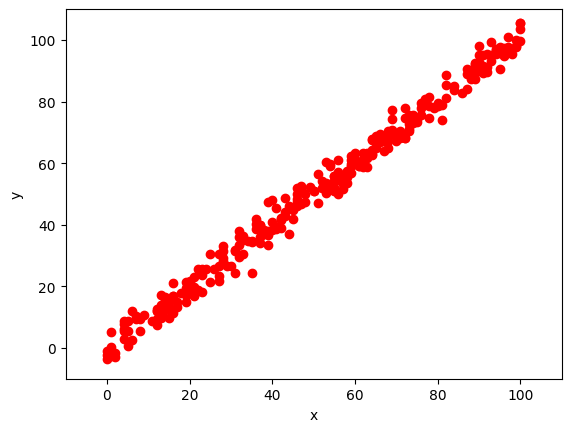

In [4]:
plt.plot(data['x'], data['y'], 'ro')
plt.axis([-10, 110, -10, 110])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
X = np.array([data['x']]).T
y = np.array([data['y']]).T
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis=1)
Xbar

array([[  1.,  77.],
       [  1.,  21.],
       [  1.,  22.],
       [  1.,  20.],
       [  1.,  36.],
       [  1.,  15.],
       [  1.,  62.],
       [  1.,  95.],
       [  1.,  20.],
       [  1.,   5.],
       [  1.,   4.],
       [  1.,  19.],
       [  1.,  96.],
       [  1.,  62.],
       [  1.,  36.],
       [  1.,  15.],
       [  1.,  65.],
       [  1.,  14.],
       [  1.,  87.],
       [  1.,  69.],
       [  1.,  89.],
       [  1.,  51.],
       [  1.,  89.],
       [  1.,  27.],
       [  1.,  97.],
       [  1.,  58.],
       [  1.,  79.],
       [  1.,  21.],
       [  1.,  93.],
       [  1.,  27.],
       [  1.,  99.],
       [  1.,  31.],
       [  1.,  33.],
       [  1.,  80.],
       [  1.,  28.],
       [  1.,  47.],
       [  1.,  53.],
       [  1.,  69.],
       [  1.,  28.],
       [  1.,  33.],
       [  1.,  91.],
       [  1.,  71.],
       [  1.,  50.],
       [  1.,  76.],
       [  1.,   4.],
       [  1.,  37.],
       [  1.,  70.],
       [  1.,

In [11]:
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
W = np.dot(np.linalg.pinv(A), b)
print('W = ', W.T)

W =  [[-0.46181077  1.01433536]]


In [7]:
w_0 = W[0][0]
w_1 = W[1][0]
x0 = np.linspace(0, 100, 2)
y0 = w_0 + w_1*x0

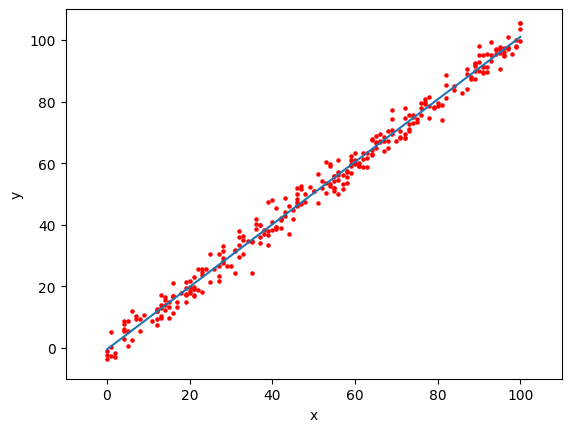

In [8]:
plt.scatter(X.T, y.T, s=5, c='red')
plt.plot(x0, y0)             
plt.axis([-10, 110, -10, 110])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Gradient descent

In [48]:
def grad(x):
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(x) - y)

def loss(x):
    N = Xbar.shape[0]
    return 0.5/N * np.linalg.norm(y - Xbar.dot(x), 2)**2

def GD(eta, x0):
    x = [x0]
    for i in range(100):
        x_new = x[-1] - eta * grad(x[-1])
        if np.linalg.norm(grad(x_new))/len(x_new) < 1e-3:
            break
        x.append(x_new)
    return x

x1 = GD(0.1, np.array([[-0.4], [1]]))
print('Solution x1 = ', x1[-1].T)

Solution x1 =  [[-2.44080268e+249 -1.63118591e+251]]


Gradient Descent với Momentum

In [47]:
def GD_momentum(x0, eta, gamma):
    # Suppose we want to store history of x
    x = [x0]
    v_old = np.zeros_like(x0)
    for it in range(100):
        v_new = gamma * v_old + eta * grad(x[-1])
        x_new = x[-1] - v_new
        if np.linalg.norm(grad(x_new))/len(x_new) < 1e-3:
            break 
        x.append(x_new)
        v_old = v_new
    return x

x2 = GD_momentum(np.array([[-0.4], [1]]), 0.1, 0.5)
print('Solution x2 = ', x2[-1].T)

Solution x1 =  [[-2.10852803e+249 -1.40912711e+251]]


Check đạo hàm

In [43]:
def numerical_grad(w):
    eps = 1e-4
    g = np.zeros_like(w)
    for i in range(len(w)):
        w_p = w.copy()
        w_n = w.copy()
        w_p[i] += eps 
        w_n[i] -= eps
        g[i] = (loss(w_p) - loss(w_n))/(2*eps)
    return g

def check_grad(w):
    w = np.random.rand(w.shape[0], w.shape[1])
    grad1 = grad(w)
    grad2 = numerical_grad(w)
    if np.linalg.norm(grad1 - grad2) < 1e-6:
        return True
    else:
        return False 
    
print('Checking gradient...', check_grad(np.array([[-0.4], [1]])))


Checking gradient... True
